In [1]:
import pandas as pd
import os

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def load_data(csv_name):
    return pd.read_csv(csv_name)

In [3]:
incidents = load_data('incidents.csv')

In [4]:
incidents.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point
0,2018/10/22 10:50:00 AM,2018/10/22,10:50,2018,Monday,2018/10/22 11:24:00 AM,72897505073,728975,180801798,182951518.0,...,"Burglary, Other Bldg., Unlawful Entry",Open or Active,VAN NESS AVE \ OAK ST,30705000.0,Northern,Tenderloin,6.0,37.775422,-122.419397,"(37.7754222198843, -122.41939688941916)"
1,2018/08/24 02:50:00 PM,2018/08/24,14:50,2018,Friday,2018/08/24 02:52:00 PM,72925174010,729251,180638466,181362475.0,...,Missing Juvenile,Open or Active,28TH AVE \ VICENTE ST,23250000.0,Taraval,Sunset/Parkside,4.0,37.738900,-122.485074,"(37.738899869536326, -122.48507449528636)"
2,2018/10/14 02:54:00 PM,2018/10/14,14:54,2018,Sunday,2018/10/24 01:10:00 PM,72980906303,729809,180807520,182971760.0,...,"Theft, From Building, $200-$950",Open or Active,PINTO AVE \ ARBALLO DR,23104000.0,Taraval,Lakeshore,7.0,37.720450,-122.483015,"(37.7204499957522, -122.48301534194144)"
3,2018/10/14 02:54:00 PM,2018/10/14,14:54,2018,Sunday,2018/10/24 01:10:00 PM,72980964070,729809,180807520,182971760.0,...,Suspicious Occurrence,Open or Active,PINTO AVE \ ARBALLO DR,23104000.0,Taraval,Lakeshore,7.0,37.720450,-122.483015,"(37.7204499957522, -122.48301534194144)"
4,2018/10/18 04:40:00 PM,2018/10/18,16:40,2018,Thursday,2018/10/26 07:42:00 AM,73011316650,730113,180791014,182911410.0,...,Methamphetamine Offense,Cite or Arrest Adult,BOARDMAN PL \ BRYANT ST,23914000.0,Southern,South of Market,6.0,37.775161,-122.403636,"(37.7751608100771, -122.40363551943442)"


In [5]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189075 entries, 0 to 189074
Data columns (total 26 columns):
Incident Datetime          189075 non-null object
Incident Date              189075 non-null object
Incident Time              189075 non-null object
Incident Year              189075 non-null int64
Incident Day of Week       189075 non-null object
Report Datetime            189075 non-null object
Row ID                     189075 non-null int64
Incident ID                189075 non-null int64
Incident Number            189075 non-null int64
CAD Number                 145912 non-null float64
Report Type Code           189075 non-null object
Report Type Description    189075 non-null object
Filed Online               40418 non-null object
Incident Code              189075 non-null int64
Incident Category          189058 non-null object
Incident Subcategory       189058 non-null object
Incident Description       189075 non-null object
Resolution                 189075 non-null o

In [6]:
incidents.isna().sum()

Incident Datetime               0
Incident Date                   0
Incident Time                   0
Incident Year                   0
Incident Day of Week            0
Report Datetime                 0
Row ID                          0
Incident ID                     0
Incident Number                 0
CAD Number                  43163
Report Type Code                0
Report Type Description         0
Filed Online               148657
Incident Code                   0
Incident Category              17
Incident Subcategory           17
Incident Description            0
Resolution                      0
Intersection                10053
CNN                         10053
Police District                 0
Analysis Neighborhood       10115
Supervisor District         10053
Latitude                    10053
Longitude                   10053
point                       10053
dtype: int64

In [7]:
incidents['Incident Category'].value_counts()

Larceny Theft                                 58818
Other Miscellaneous                           14657
Non-Criminal                                  11759
Assault                                       11143
Malicious Mischief                            10841
Burglary                                       8565
Warrant                                        6996
Lost Property                                  6926
Motor Vehicle Theft                            6455
Fraud                                          5464
Missing Person                                 5461
Recovered Vehicle                              5365
Drug Offense                                   5047
Robbery                                        4506
Offences Against The Family And Children       4240
Suspicious Occ                                 3353
Disorderly Conduct                             3224
Traffic Violation Arrest                       2539
Miscellaneous Investigation                    1613
Other Offens

In [8]:
incidents['Incident Category'].fillna(value="Unknown", inplace=True)

In [9]:
incidents.describe()

,Incident Year,Row ID,Incident ID,Incident Number,CAD Number,Incident Code,CNN,Supervisor District,Latitude,Longitude
count,189075.000000,1.890750e+05,189075.000000,1.890750e+05,1.459120e+05,189075.000000,1.790220e+05,179022.000000,179022.000000,179022.000000
mean,2018.177200,7.033312e+10,703330.949983,1.832986e+08,1.835733e+08,25698.882708,2.531337e+07,5.971249,37.769547,-122.423318
std,0.381838,4.771753e+09,47717.528350,5.673419e+06,1.030498e+07,26098.424410,3.089341e+06,2.767073,0.023984,0.025955
min,2018.000000,6.186871e+10,618687.000000,1.131000e+06,1.000000e+00,1000.000000,2.001300e+07,1.000000,37.707988,-122.511295
25%,2018.000000,6.621808e+10,662180.500000,1.803785e+08,1.811542e+08,6244.000000,2.396700e+07,3.000000,37.756834,-122.433408
50%,2018.000000,7.035391e+10,703539.000000,1.807573e+08,1.822621e+08,9024.000000,2.490400e+07,6.000000,37.775950,-122.417146
75%,2018.000000,7.445613e+10,744561.000000,1.861867e+08,1.833809e+08,62050.000000,2.634700e+07,8.000000,37.785829,-122.406957
max,2019.000000,7.858161e+10,785816.000000,9.811720e+08,1.000000e+09,75030.000000,5.400400e+07,11.000000,37.829991,-122.363743


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

#StratifiedShuffleSplit results in indices for train and test and therefore must be assigned afterwards
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(incidents, incidents["Incident Category"]):
    strat_train_set = incidents.loc[train_index]
    strat_test_set = incidents.loc[test_index]

In [11]:
exploratory = strat_test_set.copy()

In [12]:
#exploratory['Counts'] = exploratory.groupby(['Incident Category']).transform('count')
exploratory['count'] = exploratory.groupby('Incident Category')['Incident Category'].transform('count')

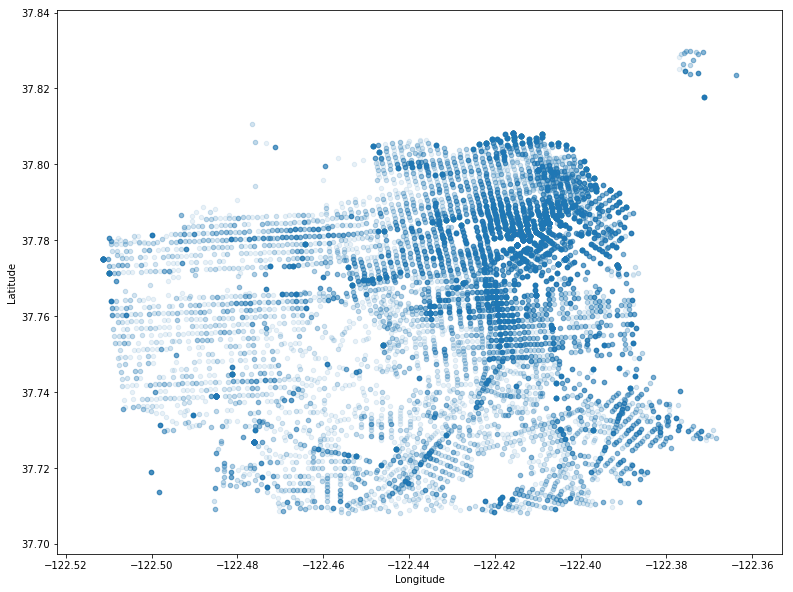

In [13]:
exploratory.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1, figsize=(13,10))

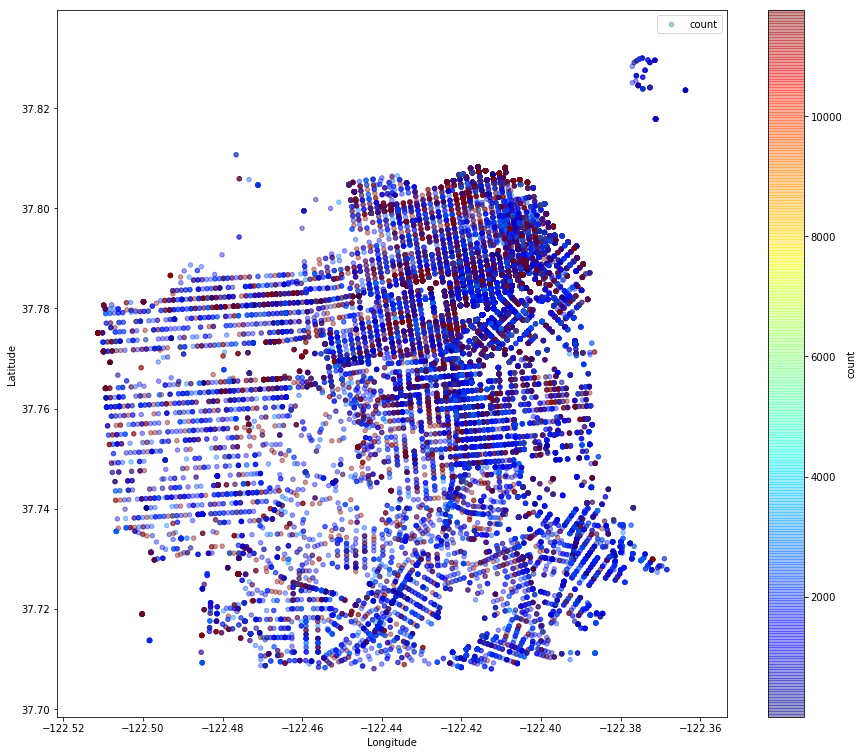

In [14]:
exploratory.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
                 #s=housing["population"]/100,
                 label="count",
                 figsize=(15,13),
                 c="count", cmap=plt.get_cmap("jet"), colorbar=True,
                sharex=False)
plt.legend()